In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/home/donal/segmentation_workflow/shufflenet/L3_logs/predictions.npz'
data = np.load(path)

slices, masks, ids = data.values()
ids = [''.join(elem) for elem in ids]

print(slices.shape, masks.shape, len(ids))

(32, 3, 512, 512) (32, 4, 512, 512) 32


In [3]:
def WL_norm(data, window, level):
        minval = level - window/2
        maxval = level + window/2
        wld = np.clip(data, minval, maxval)
        wld -= minval
        wld /= window
        return wld

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


/tmp/ipykernel_536777/2907614867.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(10, 10))


23
24
25
26
27
28
29
30
31


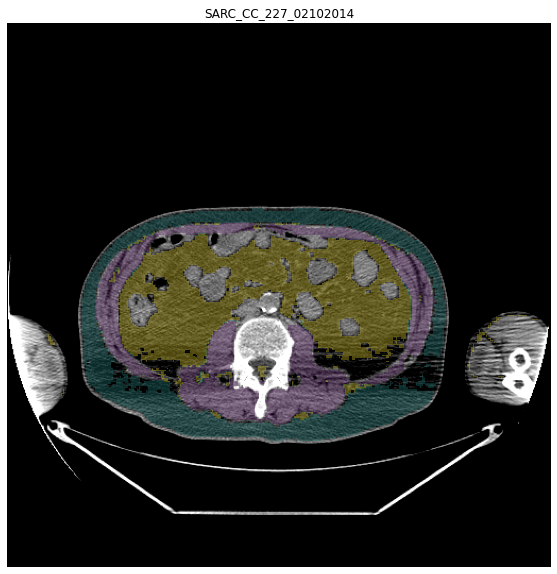

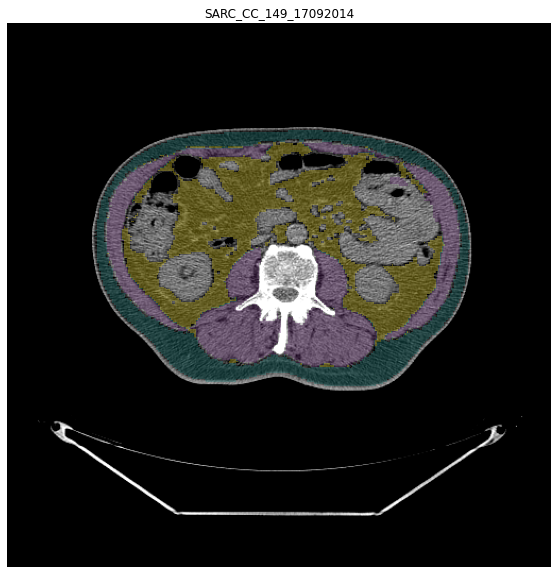

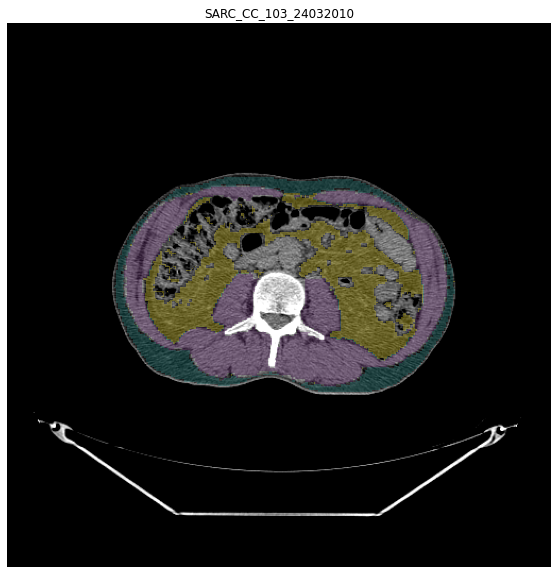

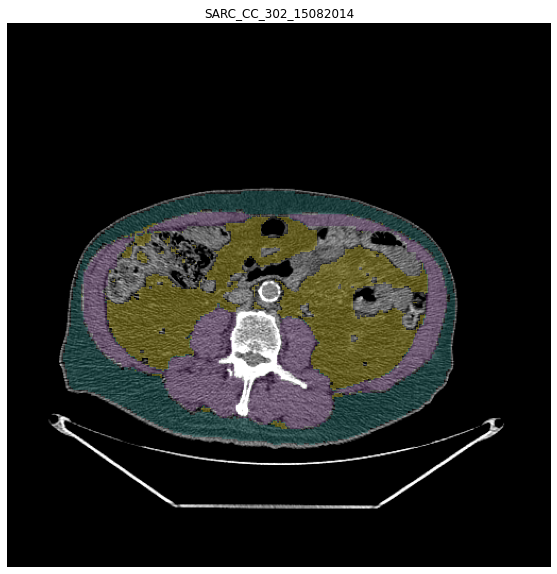

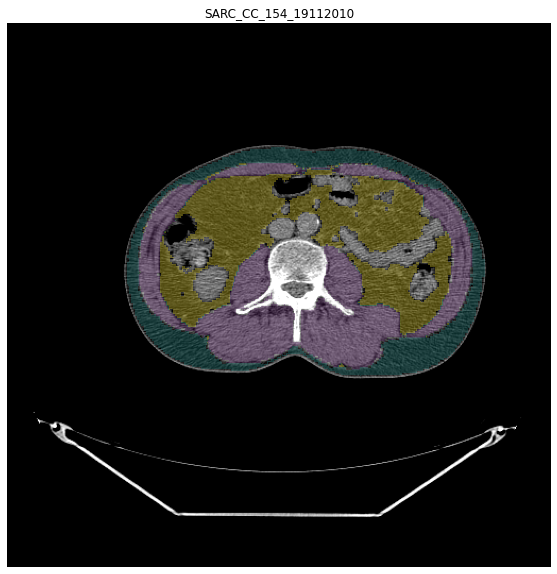

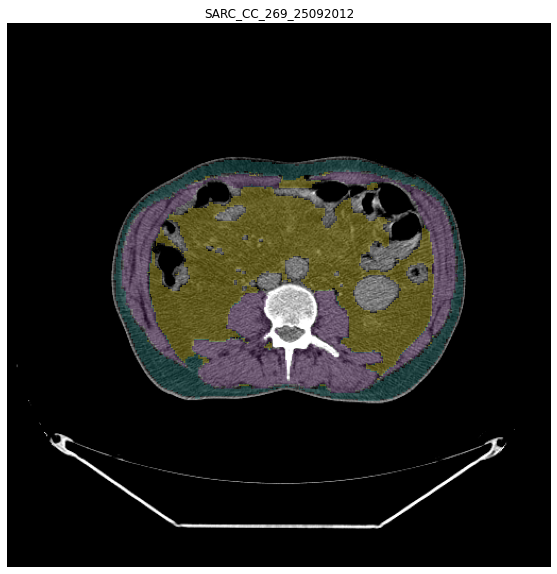

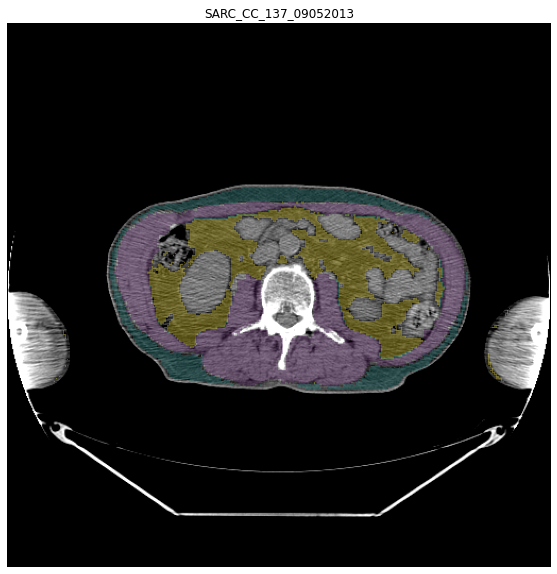

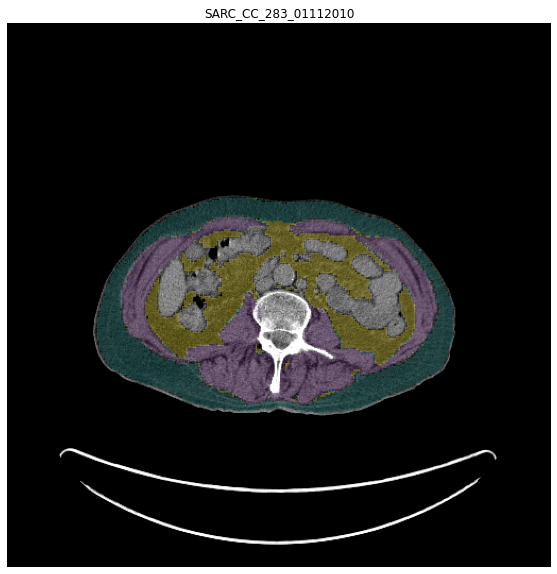

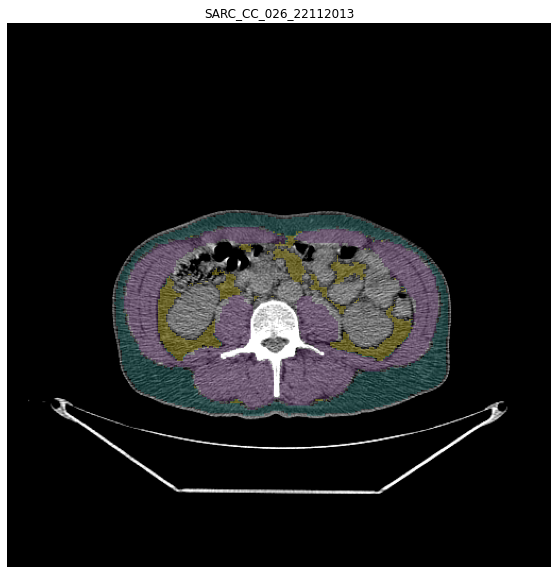

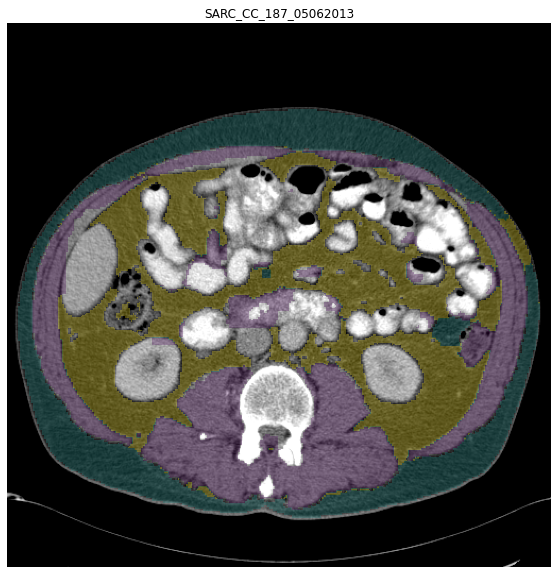

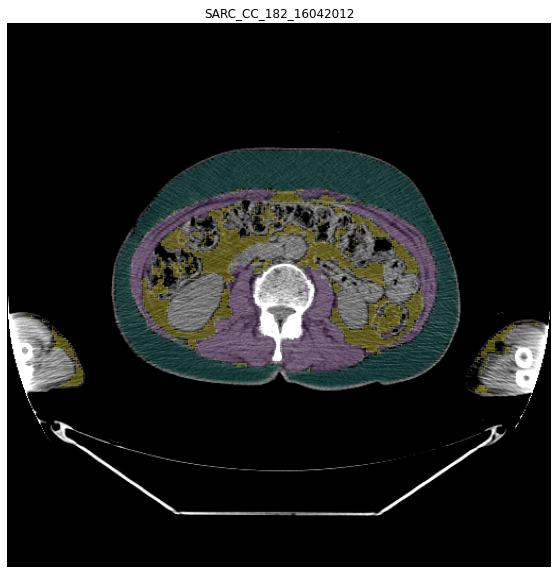

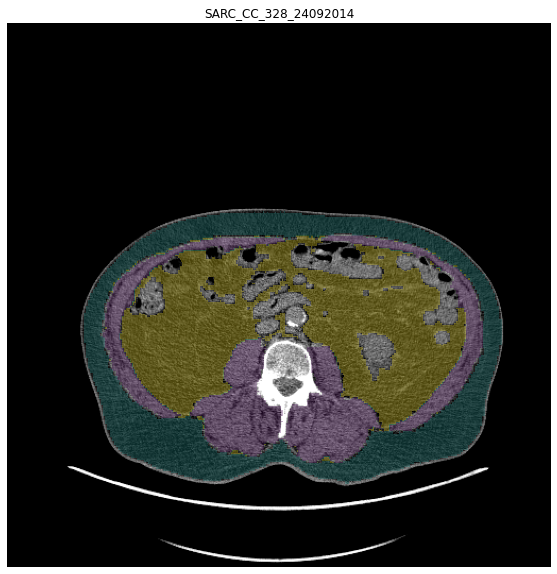

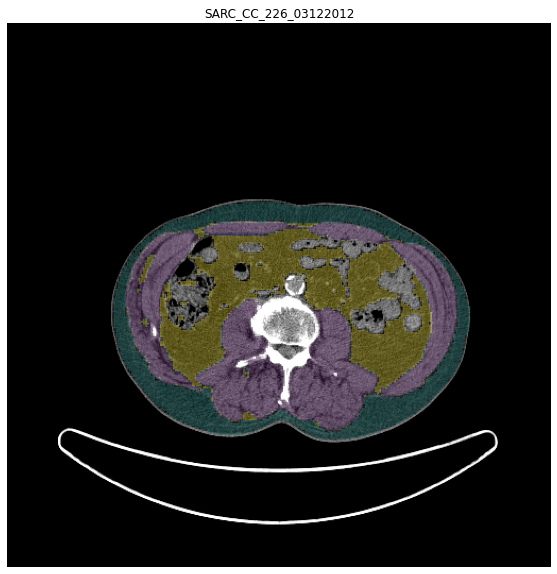

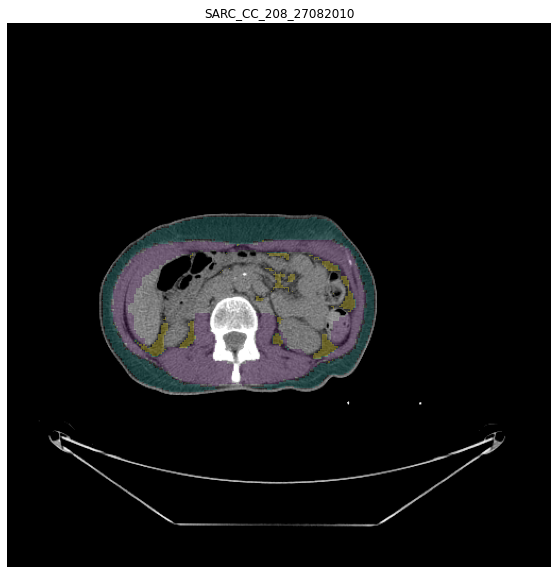

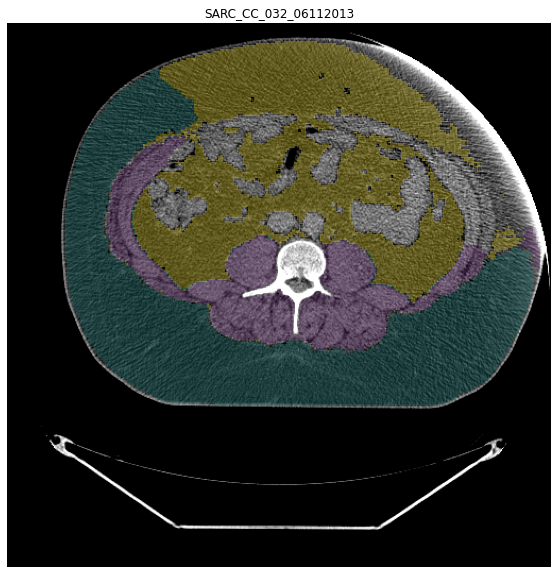

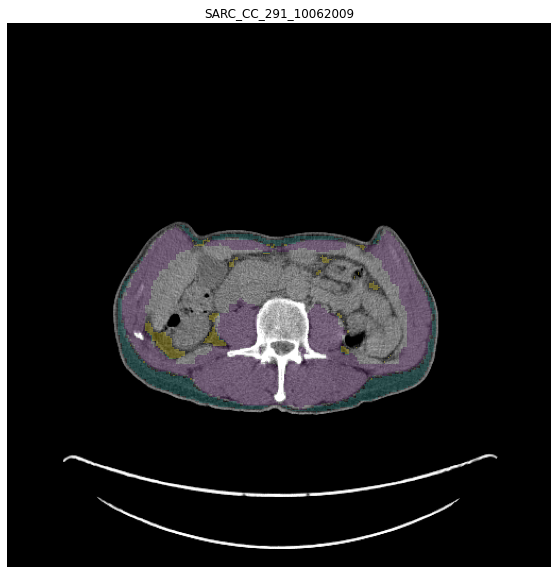

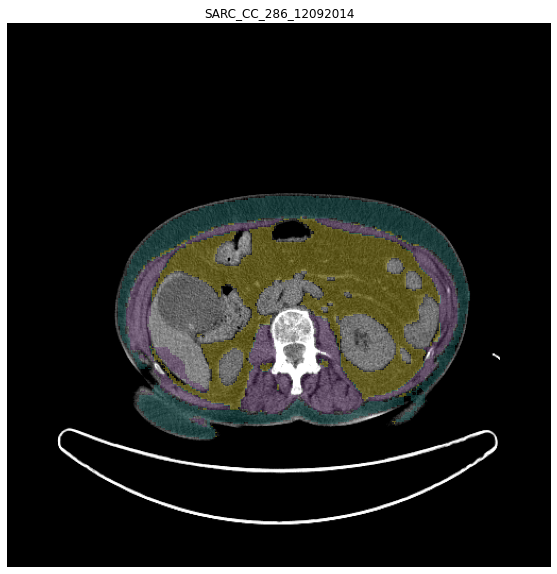

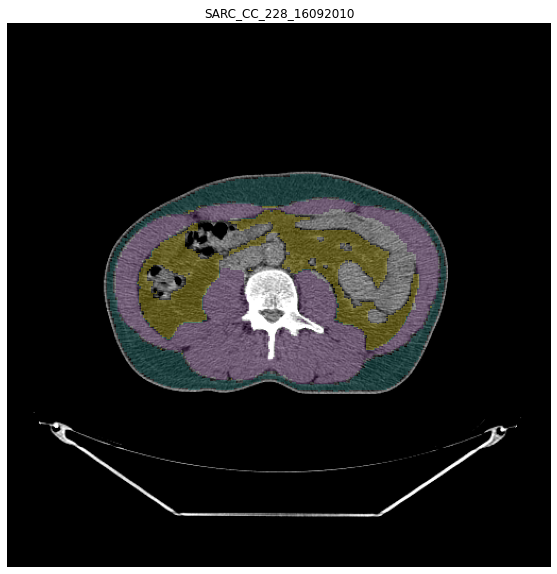

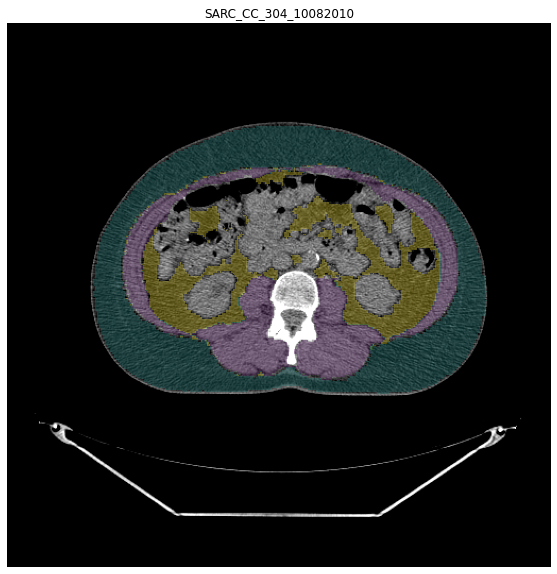

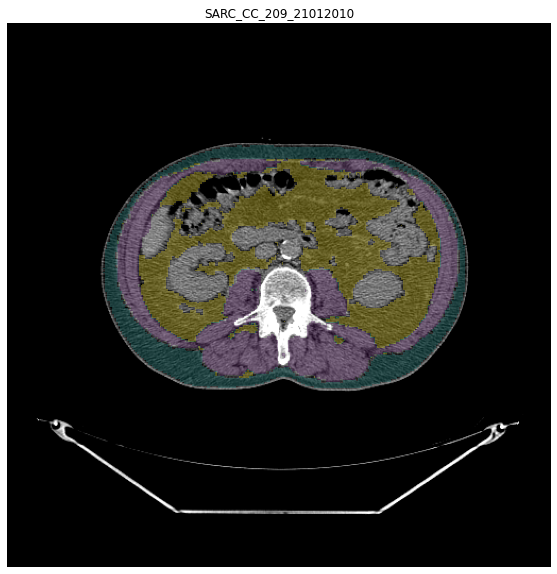

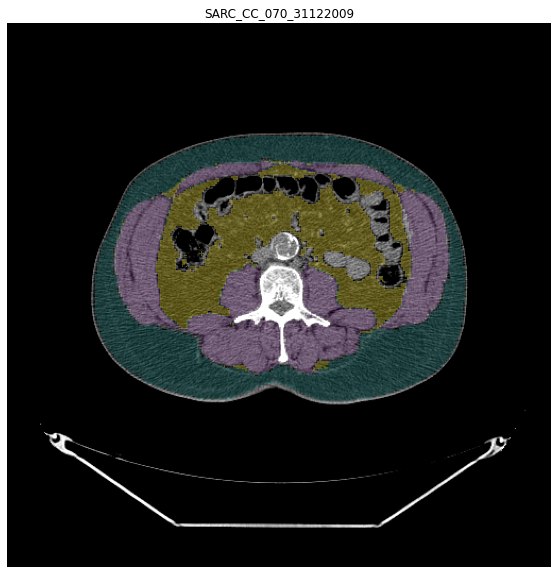

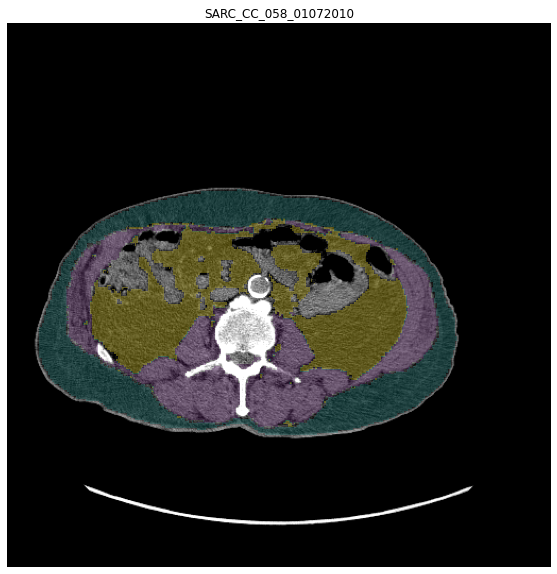

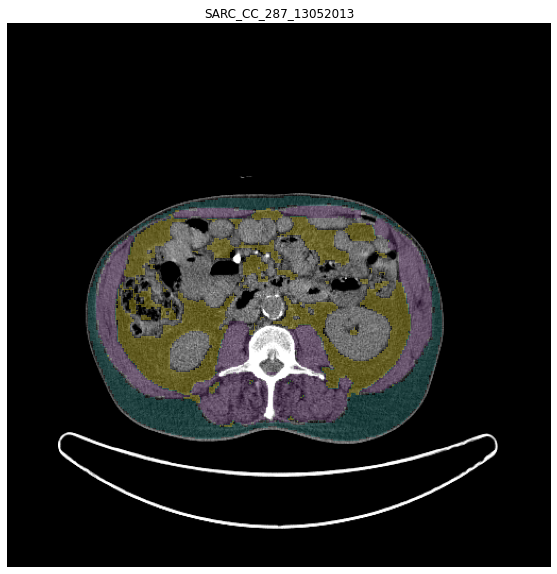

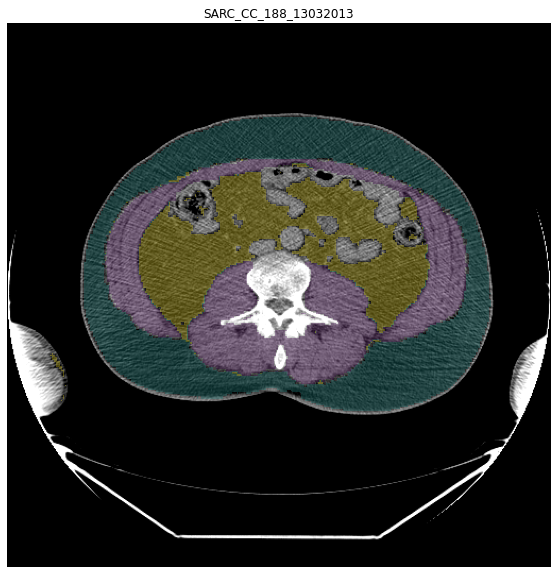

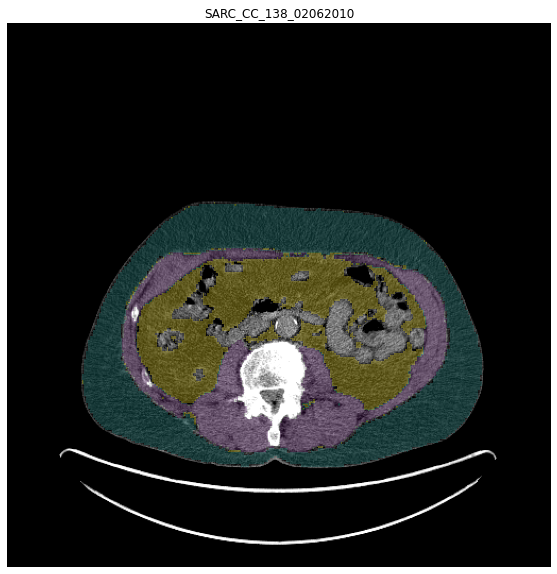

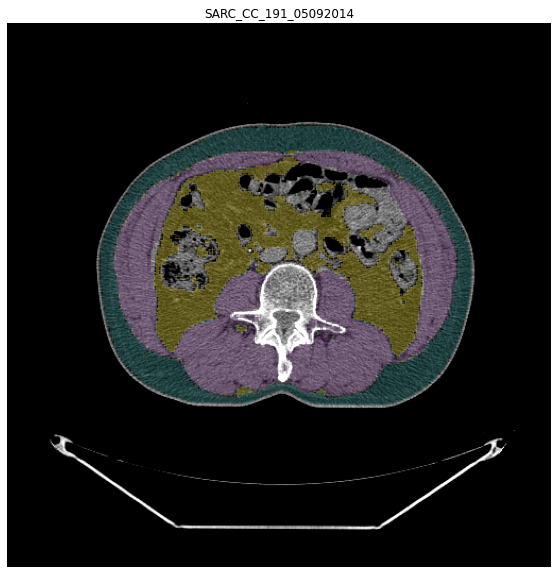

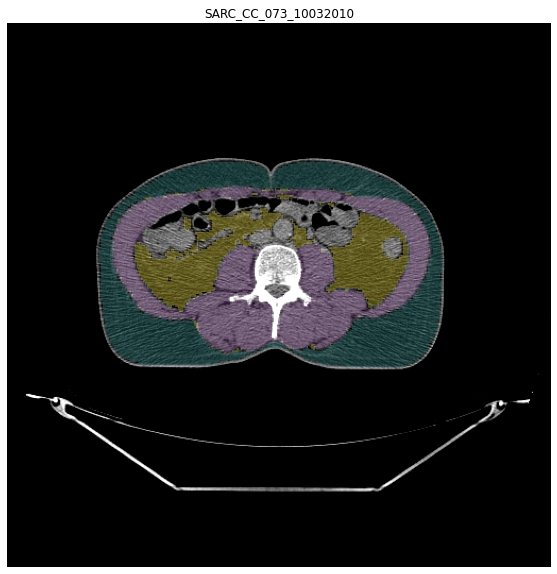

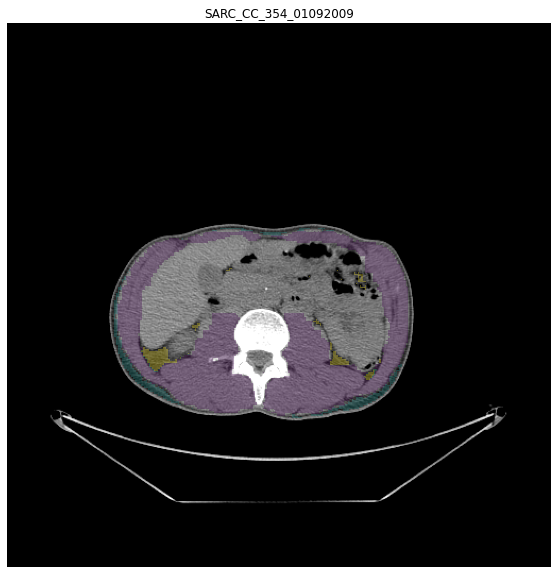

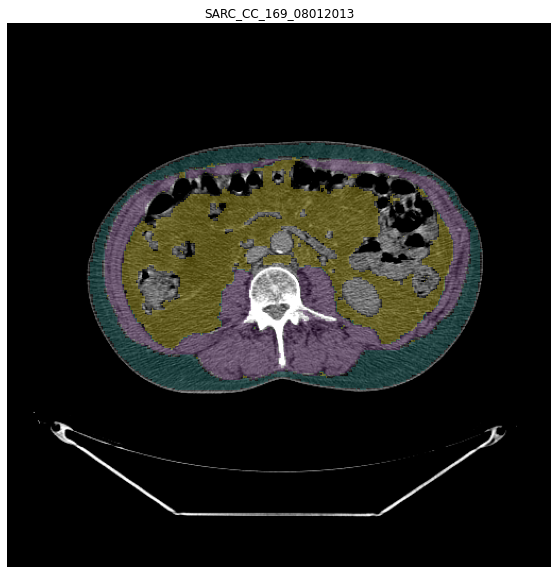

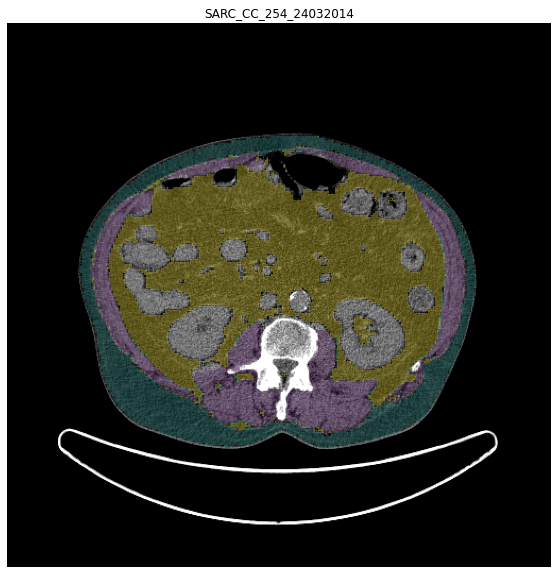

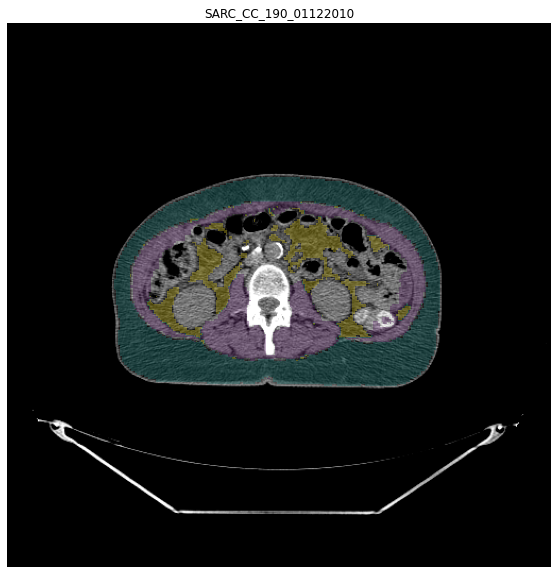

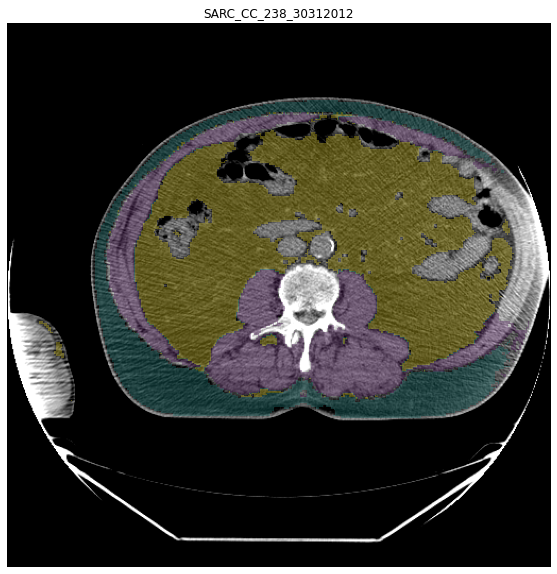

In [4]:

for n in range(len(ids)):
    print(n)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_title(ids[n])
    ax.axis('off')
    slice_ = slices[n, 1]
    #slice_ = WL_norm(slices[n, 1], window=400, level=50)


    mask = np.argmax(masks[n], axis=0)
    ax.imshow(slice_, cmap='gray')
    ax.imshow(np.where(mask==0, np.nan, mask), alpha=0.3)
    fig.savefig(f'./outputs/{ids[n]}.png')